## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

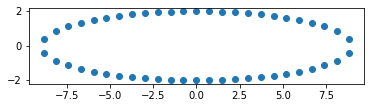

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

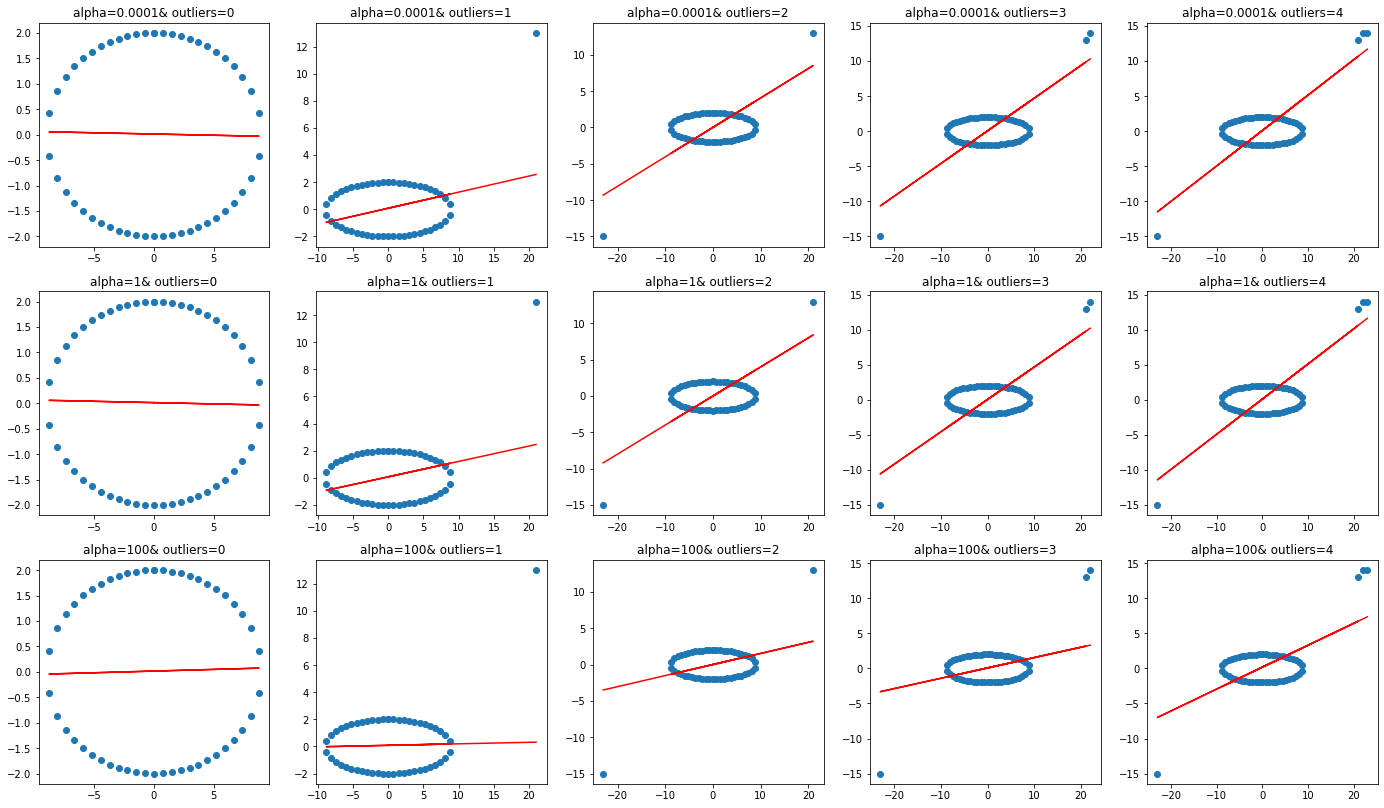

In [5]:
s=0
outlier = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
alpha=[0.0001,1,100] 
plt.figure(figsize=(24,14))
for reg in alpha:
    X_NEW=X
    Y_NEW=Y
    for j,i in enumerate(outlier):
        s=s+1
        X_NEW=np.append(X_NEW,i[0]).reshape(-1,1)
        Y_NEW=np.append(Y_NEW,i[1]).reshape(-1,1)
        model=SGDRegressor(alpha=reg, eta0=0.001, learning_rate='constant',random_state=0)
        model.fit(X_NEW,Y_NEW)
        predict=model.predict(X_NEW)
        plt.subplot(3, 5, s)
        plt.title("alpha="+str(reg)+"& outliers="+str(j))
        plt.scatter(X_NEW,Y_NEW)
        plt.plot(X_NEW,predict,color="red")

### Observations:

- We can see that when there are no outliers, we get the perfect hyperplane.
- As regularization term increases it tries to neglect the effect of outliers.
- we know that <b>Reguralization term</b> is added to <b>prevent the overfitting</b> of the model
- Alpha is a Constant that multiplies the regularization term. The higher the value, the stronger the regularization
- When regularization strength increases, it will try to reduce overfit as the number of outlier increases but we should be careful that <b>too much reguralization will leads to underfitting</b>
- From the plots we can observe:
    - when alpha has values <b>0.0001 and 1, for more than 1 outlier model will overfit.</b>
    - But when alpha is <b>100 it works well upto 3 outliers, for 4 outliers model starts to overfit.</b>


